# Neural networks

Many modern language models are build upon different neural network architectures. This is why we learn about the basic functionalities of forward neural networks in this notebook.

A neural network is defined by:

* its number of layers
* the number of neurons for each layer
* a concrete layer architecture


## A forward pass

A network can process and transform input information to a desired output. The process from input to output is called a forward pass. In case of (forward) neural network or densely connected neural networks each neuron in each layer except for the input neurons and layer is build by a composition of two mathematical operations.

1. an affine transformation: a matrix multiplication between neurons and model parameters (the weights)
2. an function activation: the result from the affine transformation is inserted into a (non-linear) function

Let $\boldsymbol{h}$ be the vector of $p$ neurons for one observation in a data set

$$
\boldsymbol{h} = 
\begin{pmatrix}
    h_1 \\
    h_2 \\
    \vdots \\
    h_{p} \\
\end{pmatrix}
$$

then, the affine transformation is given by:

$$
z = \boldsymbol{h}^{T} \boldsymbol{w}  + b = w_{1} h_{1} + w_{2} h_2 + ... + w_{p_{1}} h_{p_{1}} + b
$$

For instance, if a data set includes realizations of real estate prices and attributes of the real estates. In the input layer, the hidden neurons are, e.g., $h_1$ the number of bedrooms, $h_2$, the distance to the city center, ..., and, $h_p$ the age when the house has been built. 

The affine transformation is the same as the regression line of a linear regression model or one may interpret it as the transformation of an input variable to a new variable which is build by giving the original input different weightings. The parameters $w_1, ..., w_p$ and $b$ are values which are usually randomly initialized and trained by examples of a training data set.

In order to give the model the capability to capture non-linear relationships, the output of the affine transformation is inserted in an activation function $g(z)$. The result of this operation is the neuron for the next layer. Activation functions must be defined by a user. Let us use numbers in the superscript to define the number of the layer, then, we (re)-write:

$$
h^{(2)} = g\left( z^{(1)} \right)
$$

with

$$
z^{(1)} = \boldsymbol{h}^{(1), T} \boldsymbol{w}^{(1)}  + b^{(1)} = w_{1}^{(1)} h_{1}^{(1)} + w_{2}^{(1)} h_2^{(1)} + ... + w_{p^{(1)}}^{(1)} h_{p^{(1)}}^{(1)} + b^{(1)}
$$

If we want to generate more than one hidden neuron, we need different parameters. Let us introduce the index $k$ for this purpose:

$$
h_k^{(2)} = g(z_k^{(1)}) = g \left(w_{1k}^{(1)} h_{1}^{(1)} + w_{2k}^{(1)} h_2^{(1)} + ... + w_{p^{(1)}k}^{(1)} h_{p^{(1)}}^{(1)} + b_k^{(1)}\right)
$$

As this operation is used in general from layer $l-1$ to layer $l$, we can write:

$$
h_k^{(l)} = g(z_k^{(l-1)}) = g \left(w_{1k}^{(l-1)} h_{1}^{(l-1)} + w_{2k}^{(l-1)} h_2^{(l-1)} + ... + w_{p^{(l-1)}k}^{(l-1)} h_{p^{(l-1)}}^{(l-1)} + b_k^{(l-1)}\right) = g \left( \boldsymbol{h}^{(l-1), T} \boldsymbol{w}_k^{(l-1)} + b_k^{(l-1)} \right) 
$$

Given a data set with $n$ observations, we can use the expression:

$$
\boldsymbol{H}^{(l)} = g \left( \boldsymbol{H}^{(l-1)} \boldsymbol{W}^{(l-1)}  + \boldsymbol{b}^{(l-1)} \right)
$$

Here, the dimensions are as follow:

* $\boldsymbol{H}^{(l-1)} \in \mathbb{R}^{n \times p^{(l-1)}}$
* $\boldsymbol{H}^{(l)} \in \mathbb{R}^{n \times p^{(l)}}$
* $\boldsymbol{W}^{(l-1)} \in \mathbb{R}^{p^{(l-1)} \times p^{(l)}}$
* $\boldsymbol{b}^{(l-1)} \in \mathbb{R}^{p^{(l)}}$

and the operation $\boldsymbol{H}^{(l-1)} \boldsymbol{W}^{(l-1)} + \boldsymbol{b}^{(l-1)}$ is defined in a way such that the vector $\boldsymbol{b}^{(l-1)}$ is added to each column of the matrix $\boldsymbol{H}^{(l-1)} \boldsymbol{W}^{(l-1)}$ (this is called broadcasting).


In [388]:
import torch
from torch import nn

torch.random.seed()
H_1 = torch.normal(0, 1, size = (4, 3))
H_1

tensor([[-0.2170,  1.1317,  0.4347],
        [ 1.7212,  0.1763,  0.9345],
        [ 0.2086, -0.4057,  0.7102],
        [ 0.2550,  0.4091, -1.4098]])

### Affine transformation

In [390]:
affine_transformation = nn.Linear(in_features=H_1.shape[1], out_features=2)
affine_transformation.weight.T

tensor([[-0.3389, -0.0130],
        [ 0.0874,  0.4171],
        [ 0.0937,  0.5197]], grad_fn=<PermuteBackward0>)

In [391]:
affine_transformation.bias

Parameter containing:
tensor([-0.0227, -0.1338], requires_grad=True)

In [427]:
H_1 @ affine_transformation.weight.T + affine_transformation.bias

tensor([[ 0.1905,  0.5669],
        [-0.5031,  0.4029],
        [-0.0623,  0.0634],
        [-0.2055, -0.6992]], grad_fn=<AddBackward0>)

In [428]:
Z_1 = affine_transformation(H_1)
Z_1

tensor([[ 0.1905,  0.5669],
        [-0.5031,  0.4029],
        [-0.0623,  0.0634],
        [-0.2055, -0.6992]], grad_fn=<AddmmBackward0>)

### Activation functions

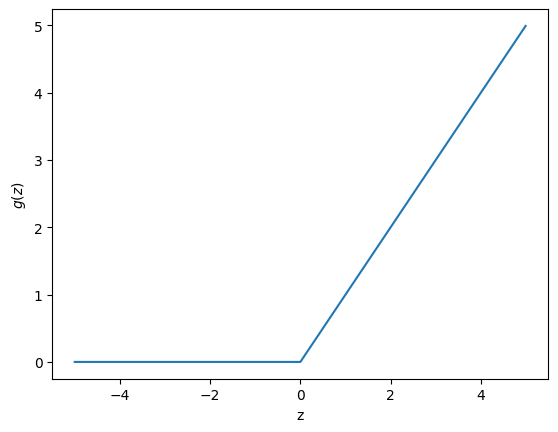

In [432]:
import matplotlib.pylab as plt

g_1 = nn.ReLU()

x = torch.arange(-5, 5, 0.01)
y = g_1(x)

plt.plot(x.numpy(), y.numpy())
plt.xlabel("z")
plt.ylabel(r"$g(z)$")
plt.show()

In [433]:
g_1 = nn.ReLU()
H_2 = g_1(Z_1)
H_2

tensor([[0.1905, 0.5669],
        [0.0000, 0.4029],
        [0.0000, 0.0634],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)

## Defining a neural network (with pytorch)

With the operations from above, we know how to create hidden neurons for a new layer out of the previous layer. Only for the input data, neurons are given by observable feature realizations. Every layer after the input layer includes neurons which are transformations from the original input. However, we can conduct exactly the same operations for neurons of any layer to create neurons for the next layer. Layers which follow the input layer are called *hidden layers*.

How many layers we want to create, depends on the user's choice. Due to mathematical reasons which are called vanishing and exploding gradients, respectively, common forward neural networks usually only include a relatively small number of hidden layers. For every layer, the number of hidden neurons and the activation functions can be different. The only layer for which the dimension (number of hidden neurons) and the activation function is fixed sometimes, is the last layer, called the *output layer*. It depends, if the output must be of a specific shape. For instance, if we stick to the real estate price example, we would like to have a single number for each observation which we use as a prediction for the actual real estate value. 

The cell below uses pytorch nn.Module parent class to define a class which is able to instantiate a forward neural network. In our example, the network has only a single hidden layer between input and output layer. The activation function is set to be the ReLU function. However, we can define the number of input, hidden and output neurons.

The *__init__* method defines the functions which are used for the forward pass, *linear_1, linear_2* are affine transformations and *activation* is the activation function. The *forward* method defines how data is processed through the network. If we stick to the notation from above, this network's forward pass is given by:

$$
\boldsymbol{H}^{(3)} = \left(g \left( \boldsymbol{H}^{(1)} \boldsymbol{W}^{(1)}  + \boldsymbol{b}^{(1)} \right) \right) \boldsymbol{W}^{(2)}  + \boldsymbol{b}^{(2)}
$$

In [411]:
from torch import nn

class ForwardNN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=in_dim, out_features=hidden_dim)
        self.linear_2 = nn.Linear(in_features=hidden_dim, out_features=out_dim)
        self.activation = nn.ReLU()

    def forward(self, X):
        h_2 = self.activation(self.linear_1(X))
        h_3 = self.linear_2(h_2)
        return h_3

A good check for yourself if you understand the forward process correctly is to set a number of input, hidden and output neurons and determine the number of parameters which are used by the model. For instance, in the example below, the input dimension is 3 input variable, we have 2 hidden neurons and 1 output neuron. How many weights and bias parameters are needed to process these dimensionalities through the forward network? See below if you can figure it out.

In [435]:
forward_nn = ForwardNN(in_dim = H_1.shape[1], hidden_dim = 3, out_dim = 1)

for name, param in forward_nn.named_parameters():
    print("-"*100)
    print(f"{name} parameters:\n {param}")

----------------------------------------------------------------------------------------------------
linear_1.weight parameters:
 Parameter containing:
tensor([[-0.4510,  0.4661,  0.1420],
        [-0.4691, -0.5438,  0.0619],
        [ 0.4374,  0.2499,  0.2233]], requires_grad=True)
----------------------------------------------------------------------------------------------------
linear_1.bias parameters:
 Parameter containing:
tensor([-0.4766,  0.5229, -0.4615], requires_grad=True)
----------------------------------------------------------------------------------------------------
linear_2.weight parameters:
 Parameter containing:
tensor([[-0.3696,  0.4754,  0.4442]], requires_grad=True)
----------------------------------------------------------------------------------------------------
linear_2.bias parameters:
 Parameter containing:
tensor([0.0286], requires_grad=True)


If the model is defined as above, the whole forward process can be calculated by the call method as shown below.

In [440]:
forward_nn = ForwardNN(in_dim = H_1.shape[1], hidden_dim = 2, out_dim = 1)
forward_nn(H_1)

tensor([[0.1143],
        [0.1491],
        [0.1346],
        [0.0759]], grad_fn=<AddmmBackward0>)

One last time, see for yourself that this forward pass is just a composition of matrix multiplication and (non)-linear function activations.

In [441]:
H_2 = g_1(H_1 @ forward_nn.linear_1.weight.T + forward_nn.linear_1.bias)
H_3 = H_2 @ forward_nn.linear_2.weight.T + forward_nn.linear_2.bias
H_3

tensor([[0.1143],
        [0.1491],
        [0.1346],
        [0.0759]], grad_fn=<AddBackward0>)

## Training a neural network - gradient descent

Now we know how to process input information through a neural network and create output as we desire. So far, the parameters of the model are randomly initialized and useless for a specific use case. This is why we adjust the model parameters to a specific task. For instance, in the real estate example, we would like to create predictions which are close to actual real estate prices. This is why we

* collect data $D$, e.g., $D = \lbrace (\mathbf{x}_1, y_1), ({x}_2, y_2), ..., ({x}_n, y_n) \rbrace$ 
* create predictions by a forward pass $\hat{y}_1, \hat{y}_2, ..., \hat{y}_1$
* and compare target realizations with predictions

To evaluate how good predictions are, we use a loss function $L$. In general, the loss function is lower if predictions of the network are more in line with target realizations. In case of a regression task (the target variable is a real-valued number), a common loss function is the mean-squared error:

$$
L_{\Theta} \left(\mathbf{y}, \hat{\mathbf{y}}\right) = \frac{1}{n} \sum_{i=1}^n \left(y_i - \hat{y}_i \right)^2
$$

with $\Theta$ representing the set of all parameters of the network. The following aspects are important in this context:

* The value of the loss function can only be manipulated by choosing different parameters $\Theta$
* Each time, we collect a new data sample, the same set of parameters will create a different loss function value

To find parameters which work best for a given data sample, we minimize the loss function and use the corresponding parameters for a network. Mathematically:

$$
\hat{\boldsymbol{\Theta}} = \argmin_{\boldsymbol{\Theta}} L_{\Theta} \left(\boldsymbol{y}, \boldsymbol{\hat{y}}\right)
$$

While such an optimization problem can be solved analytically for simple models such as the linear regression model, this is not the case for neural networks. Neural networks usually are trained (this is synonym to we minimize the loss function) by an iterative procedure which makes use of gradient information. The gradient is the vector of all partial derivatives:

$$
\nabla L_{\Theta}  = 
\begin{pmatrix}
\frac{\partial L_{\Theta}}{\partial \theta_1} \\
\vdots \\
\frac{\partial L_{\Theta}}{\partial \theta_q} \\
\end{pmatrix}
$$

with $q$ being the number of all parameters. The partial derivative tells us how the function value changes, if one parameter is increased by an infinitesimal small number. This is valuable information, because it can be used as a decision rule:

* If the partial derivative is larger than zero, increasing the parameter would increase the loss, so we want to decrease the current parameter value
* If the partial derivative is smaller than zero, increasing the parameter would decrease the loss, so we want to increase the current parameter value
* If the partial derivative is at zero (or close to), we may have found a stationary point which in the best case is a global or at least a local minimum of the loss function

Mathematically, this rule can be subsumed by the gradient step between iteration $k-1$ and $k$ by:

$$
\Theta^k \leftarrow \Theta^{k-1} - \eta \nabla L_{\Theta}
$$

Hereby, $\eta$ is called a learning rate which makes sure that changes in the parameter values are not to drastic and that the model is smoothly improved over many iteration steps. Some refinements of this algorithm use more sophisticated rules for the learning rate, e.g., use a dynamic learning rate to make larger changes in the beginning of training and reduce the step size after the model has been trained for a while. However, the usage of gradient information remains. This iterative optimization is called gradient descent. Note that the gradient descent step can be determined by:

* using all data to determine the gradient
* only using a single randomly drawn observation from the data set per iteration (stochastic gradient descent)
* using a randomly drawn subsample of the data set per iteration (batch gradient descent)

Batch gradient descent is used most often. For a simple example, let us consider the following problem, we have one data point $x = 2, y = 3$, the model is defined by $f_{\theta}(x) = \theta \cdot x $. We want to find a value for $\theta$ such that $L_{\theta} = \left(y - \theta \cdot x\right)^2$ is minimized. The solution is $\theta = 1.5$, however, let us try the gradient descent algorithm and assume we start randomly at $\theta = 0.7645$, the resulting loss is: $L_{\theta} = 2.1636$, the derivative is $-5.8837$. This means, we should further increase the parameter as increasing it will have a negative impact on the loss function. With a learning rate $\eta = 0.01$, we increase the parameter by $0.0588$ which leads to a new parameter value of $0.8234$.

The cell below shows how this is done with pytorch. After generating a prediction *y_hat* and determining the *loss*, the *loss.backward()* call, determines the gradient, i.e., the partial derivative of the loss function $L$ w.r.t. the parameter $\theta$. The *optimizer.step()* applies the gradient step.

In [509]:
import torch
from torch import nn

torch.manual_seed(42)

x = torch.tensor([[2.]])
y = torch.tensor([3.])

f = nn.Linear(in_features=1, out_features=1, bias=False)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=f.parameters(), lr = 0.01)

f.train()
optimizer.zero_grad()
y_hat = f(x)
loss = loss_fn(y_hat.view(-1), y)
loss.backward()
print(f"Parameter before gradient update: {f.weight.detach().numpy().flatten()[0]:.4f}")
print(f"Loss: {loss.item():.4f}")
print(f"Gradient value: {f.weight.grad.detach().numpy().flatten()[0]:.4f}")
print(f"The learning rate is: {0.01}")
optimizer.step()
print(f"Parameter after gradient update: {f.weight.detach().numpy().flatten()[0]:.4f}")

Parameter before gradient update: 0.7645
Loss: 2.1636
Gradient value: -5.8837
The learning rate is: 0.01
Parameter after gradient update: 0.8234


The code below executes the gradient step for 150 iterations. See in the output, how step by step, the loss decreases, the gradient approaches close to zero and the parameter close to $1.5$.

In [504]:
import torch
from torch import nn

x = torch.tensor([[2.]])
y = torch.tensor([3.])

f = nn.Linear(in_features=1, out_features=1, bias=False)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=f.parameters(), lr = 0.01)

f.train()
n_iteration_steps = 150

for _ in range(n_iteration_steps):
    optimizer.zero_grad()
    y_hat = f(x)
    loss = loss_fn(y_hat.view(-1), y)
    loss.backward()
    print("-"*50)
    print(f"Parameter before gradient update: {f.weight.detach().numpy().flatten()[0]:.4f}")
    print(f"Loss: {loss.item():.4f}")
    print(f"Gradient value: {f.weight.grad.detach().numpy().flatten()[0]:.4f}")
    print(f"The learning rate is: {0.01}")
    optimizer.step()
    print(f"Parameter after gradient update: {f.weight.detach().numpy().flatten()[0]:.4f}")

--------------------------------------------------
Parameter before gradient update: 0.0143
Loss: 8.8294
Gradient value: -11.8857
The learning rate is: 0.01
Parameter after gradient update: 0.1331
--------------------------------------------------
Parameter before gradient update: 0.1331
Loss: 7.4732
Gradient value: -10.9349
The learning rate is: 0.01
Parameter after gradient update: 0.2425
--------------------------------------------------
Parameter before gradient update: 0.2425
Loss: 6.3253
Gradient value: -10.0601
The learning rate is: 0.01
Parameter after gradient update: 0.3431
--------------------------------------------------
Parameter before gradient update: 0.3431
Loss: 5.3537
Gradient value: -9.2553
The learning rate is: 0.01
Parameter after gradient update: 0.4356
--------------------------------------------------
Parameter before gradient update: 0.4356
Loss: 4.5314
Gradient value: -8.5148
The learning rate is: 0.01
Parameter after gradient update: 0.5208
-----------------

# Training neural networks with pytorch

As we have some basic understanding, how neural networks are defined and trained, let us take a look at three common examples.

* A regression task
* A binary classification
* A multi-class classification

## Training a network for a regression task

The code below creates an artificial data set with five feature variables and a real-value target variable. The pairplot below illustrates all pairwise relationships. The last row shows the relationships between feature variables and the target variable. Relationships seem to be different in strength and form. For more details, how the data is created, see [this information](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman1.html).

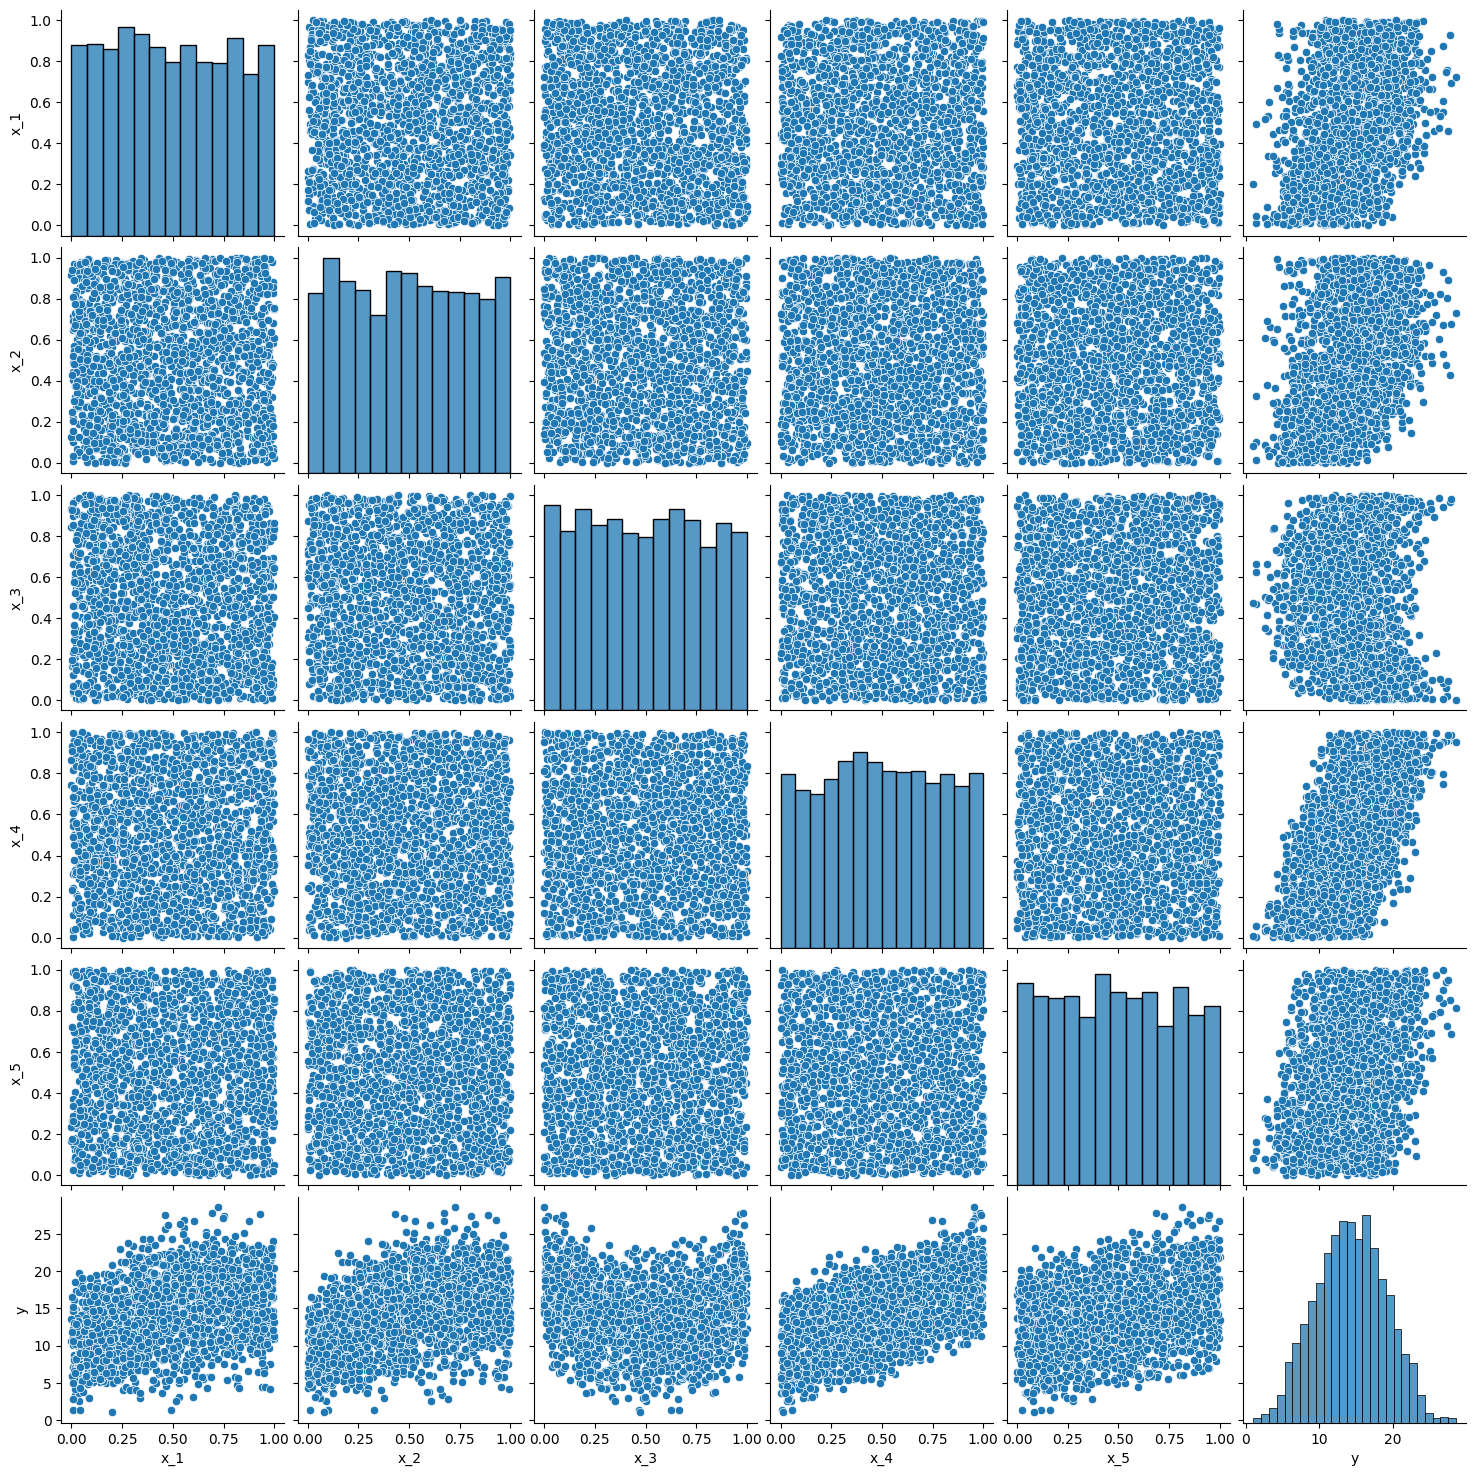

In [1]:
from sklearn.datasets import make_friedman1
import numpy as np
import pandas as pd
import seaborn as sns

X, y = make_friedman1(n_samples = 2000, n_features=5, random_state=42)
df = pd.DataFrame(np.concatenate((X, y.reshape(-1, 1)), axis = 1), columns = [f"x_{i+1}" for i in range(X.shape[1])] + ["y"])
pairsplot = sns.pairplot(df)

Before training a neural network, we should normalize the feature space in some way, otherwise, numerical problems can occur. The cell below normalizes each variable (except the target variable) to the numerical range $[-1, 1]$. For a variable $x$, this is done by min-max standardization:

$$
\tilde{x} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

with $\tilde{x} \in [0, 1]$ and transforming it to the desired feature range by:

$$
z = \tilde{x} (x_{u} - x_{l}) + x_{l}
$$

with $z \in [x_l, x_u]$.

Furthermore, we want to examine at a later point of the analysis, if a trained neural network works well for new data which has not been used for training the network. Only if this is true, the model seems to have learned the general relationship between feature and target variables. In the simplest scenario, we just split the data into training and test data. Even for the normalization step, only training data should be used.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler.fit(X_train)
X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

print("First five feature observations before normalization:")
print(X_train[:5].round(4))

print("\nFirst five feature observations before normalization:")
print(X_train_s[:5].round(4))

First five feature observations before normalization:
[[0.428  0.6583 0.2638 0.0121 0.5189]
 [0.3657 0.2254 0.1958 0.1408 0.6224]
 [0.2706 0.2488 0.9421 0.2983 0.7755]
 [0.7633 0.1365 0.2287 0.8825 0.0201]
 [0.099  0.2714 0.8551 0.3465 0.973 ]]

First five feature observations before normalization:
[[-0.143   0.3169 -0.4721 -0.9766  0.0382]
 [-0.2679 -0.5492 -0.6082 -0.7189  0.2453]
 [-0.4584 -0.5023  0.885  -0.4037  0.5516]
 [ 0.5287 -0.727  -0.5425  0.7658 -0.96  ]
 [-0.8022 -0.4571  0.7111 -0.3072  0.9469]]


To work with pytorch, it is helpful to bring the data into the tensor-format and create a data loader which is executing batches of data samples.

In [3]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train_s, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_s, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_test = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 16  
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
data_loader_test = DataLoader(dataset_test, batch_size=X_test.shape[0], shuffle=False)

X_batch, y_batch = next(iter(data_loader_train))

print("First batch of the training data:\nX:")
print(X_batch)
print("\ny:")
print(y_batch)

First batch of the training data:
X:
tensor([[-0.1430,  0.3169, -0.4721, -0.9766,  0.0382],
        [-0.2679, -0.5492, -0.6082, -0.7189,  0.2453],
        [-0.4584, -0.5023,  0.8850, -0.4037,  0.5516],
        [ 0.5287, -0.7270, -0.5425,  0.7658, -0.9600],
        [-0.8022, -0.4571,  0.7111, -0.3072,  0.9469],
        [ 0.1054, -0.5380,  0.4877,  0.0642,  0.6187],
        [-0.5661,  0.3396,  0.9423, -0.6490,  0.1947],
        [ 0.1821, -0.4638,  0.2489, -0.1812,  0.1045],
        [ 0.5636, -0.5699,  0.4320,  0.6008, -0.3077],
        [-0.4006, -0.7997, -0.4563,  0.6326, -0.2432],
        [-0.8661,  0.5003, -0.5800,  0.7970, -0.5898],
        [-0.2114,  0.3028, -0.7867,  0.3161,  0.9997],
        [ 0.9574,  0.5150, -0.6765, -0.0461,  0.4372],
        [ 0.1421, -0.8929, -0.7189,  0.2455, -0.5844],
        [-0.9767, -0.3986,  0.1567, -0.2482,  0.0701],
        [ 0.7221, -0.4963,  0.9630,  0.2278,  0.5877]])

y:
tensor([11.5714,  8.9308, 12.8675, 13.6131, 11.6947, 14.4497, 13.5778, 11.9315

To train a model, we define and initialize:

* a model which is specified by a specific neural network architecture and initialized with random parameters in the beginning
* a loss function which is used to calculate losses for batches of data during training and determine the gradient
* an optimizer which takes care to apply a gradient descent based update of the parameters

In the cell below *inputs* are the feature values for th first batch in the training data, *targets* are the corresponding values of the target variable, the call to *optimizer.zero_grad()* resets the gradient, *outputs* are the predictions, given current model parameters. After the loss is calculated, the call to *loss.backward()* internally calculates the gradient by applying the backpropagation through the network.

In [4]:
from torch.optim import SGD
from torch import nn

class ForwardNN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=in_dim, out_features=hidden_dim)
        self.linear_2 = nn.Linear(in_features=hidden_dim, out_features=out_dim)
        self.activation = nn.ReLU()

    def forward(self, X):
        h_2 = self.activation(self.linear_1(X))
        h_3 = self.linear_2(h_2)
        return h_3
    
model = ForwardNN(in_dim = X.shape[1], hidden_dim = 3, out_dim = 1)
loss_fn = nn.MSELoss()
optimizer = SGD(model.parameters(), lr = 0.01)

inputs, targets = next(iter(data_loader_train))
optimizer.zero_grad()
outputs = model(inputs)
loss = loss_fn(outputs, targets.view(-1, 1))
loss.backward()

Let us take a look at one gradient step. The cell below exhibits the parameters before the update.

In [5]:
for name, param in model.named_parameters():
    print(f"{name} parameters:\n {param}")

linear_1.weight parameters:
 Parameter containing:
tensor([[ 2.9888e-01,  1.9166e-01, -8.9617e-05,  2.1160e-01, -3.2250e-01],
        [ 2.9967e-01, -3.5213e-01,  3.5898e-01, -4.2392e-01,  1.0261e-01],
        [ 1.2886e-02,  4.2176e-01, -3.1073e-01,  4.0938e-01,  2.6842e-01]],
       requires_grad=True)
linear_1.bias parameters:
 Parameter containing:
tensor([-0.3749, -0.1714, -0.1063], requires_grad=True)
linear_2.weight parameters:
 Parameter containing:
tensor([[ 0.0344,  0.0713, -0.4243]], requires_grad=True)
linear_2.bias parameters:
 Parameter containing:
tensor([0.4973], requires_grad=True)


The gradient value w.r.t. to every parameter for this batch of data is:

In [9]:
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"{name} gradient:\n {param.grad}")

linear_1.weight gradient:
 tensor([[-0.0298,  0.0410,  0.0306, -0.0432,  0.0541],
        [-0.0234,  0.3841, -0.5522,  0.0921, -0.3491],
        [ 0.0569,  1.1732, -1.9350,  0.8678,  1.1524]])
linear_1.bias gradient:
 tensor([-0.0564, -0.9447,  2.7711])
linear_2.weight gradient:
 tensor([[-0.1892, -3.5562, -3.4571]])
linear_2.bias gradient:
 tensor([-26.3124])


This applies the gradient update using gradient values.

In [10]:
optimizer.step()

And these are the parameter values after the update. See for yourself, how this works. Every parameter with a negative gradient should increase after the update, while every parameter with a positive gradient should decrease.

In [11]:
for name, param in model.named_parameters():
    print(f"{name} parameters:\n {param}")

linear_1.weight parameters:
 Parameter containing:
tensor([[ 2.9917e-01,  1.9125e-01, -3.9548e-04,  2.1203e-01, -3.2304e-01],
        [ 2.9990e-01, -3.5598e-01,  3.6450e-01, -4.2484e-01,  1.0610e-01],
        [ 1.2316e-02,  4.1003e-01, -2.9138e-01,  4.0070e-01,  2.5690e-01]],
       requires_grad=True)
linear_1.bias parameters:
 Parameter containing:
tensor([-0.3744, -0.1620, -0.1340], requires_grad=True)
linear_2.weight parameters:
 Parameter containing:
tensor([[ 0.0363,  0.1068, -0.3898]], requires_grad=True)
linear_2.bias parameters:
 Parameter containing:
tensor([0.7604], requires_grad=True)


If we execute the steps from above for all batches of the data set, we trained the network for one epoch. The cell below shows how to train the network for multiple epochs. Furthermore, the code example calculates the average loss over all training and test data batches per epoch and prints their values. If everything works as desired, botch losses should gradually decrease over epochs in similar relative value ranges. Note, that we now use an optimization algorithm which applies the gradient update rule in a more dynamic way during training.

In [12]:
import torch
from torch import nn
from torch.optim import Adam

# Model, loss function, and optimizer
model = ForwardNN(in_dim=X.shape[1], hidden_dim=2, out_dim=1)
model.train()
loss_fn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.005)

n_epochs = 50
train_loss_history, test_loss_history = [], []
for epoch in range(n_epochs):
    # Training phase
    model.train()  # Ensure the model is in training mode
    epoch_training_loss = 0
    for inputs, targets in data_loader_train:
        optimizer.zero_grad()         # Zero the gradients
        outputs = model(inputs)       # Forward pass
        loss = loss_fn(outputs, targets.view(-1, 1))  # Calculate loss
        loss.backward()               # Backward pass
        optimizer.step()              # Update parameters
        epoch_training_loss += loss.item()

    avg_epoch_training_loss = epoch_training_loss / len(data_loader_train)
    print(f"Epoch [{epoch+1}/{n_epochs}], Training Loss: {avg_epoch_training_loss:.4f}")
    train_loss_history.append(avg_epoch_training_loss)

    # Testing phase
    model.eval()  # Set model to evaluation mode
    test_epoch_loss = 0
    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, targets in data_loader_test:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets.view(-1, 1))
            test_epoch_loss += loss.item()
    
    avg_test_loss = test_epoch_loss / len(data_loader_test)
    print(f"Epoch [{epoch+1}/{n_epochs}], Test Loss: {avg_test_loss:.4f}")
    test_loss_history.append(avg_test_loss)

Epoch [1/50], Training Loss: 222.3427
Epoch [1/50], Test Loss: 211.4380
Epoch [2/50], Training Loss: 177.8033
Epoch [2/50], Test Loss: 156.9049
Epoch [3/50], Training Loss: 120.4733
Epoch [3/50], Test Loss: 95.4004
Epoch [4/50], Training Loss: 66.1577
Epoch [4/50], Test Loss: 46.6745
Epoch [5/50], Training Loss: 29.7642
Epoch [5/50], Test Loss: 19.7225
Epoch [6/50], Training Loss: 12.6741
Epoch [6/50], Test Loss: 9.4346
Epoch [7/50], Training Loss: 7.1251
Epoch [7/50], Test Loss: 6.7441
Epoch [8/50], Training Loss: 5.8897
Epoch [8/50], Test Loss: 6.2178
Epoch [9/50], Training Loss: 5.6807
Epoch [9/50], Test Loss: 6.1269
Epoch [10/50], Training Loss: 5.6495
Epoch [10/50], Test Loss: 6.1112
Epoch [11/50], Training Loss: 5.6451
Epoch [11/50], Test Loss: 6.1086
Epoch [12/50], Training Loss: 5.6448
Epoch [12/50], Test Loss: 6.1086
Epoch [13/50], Training Loss: 5.6452
Epoch [13/50], Test Loss: 6.1089
Epoch [14/50], Training Loss: 5.6458
Epoch [14/50], Test Loss: 6.1094
Epoch [15/50], Trainin

This visualizes the progress of losses during training.

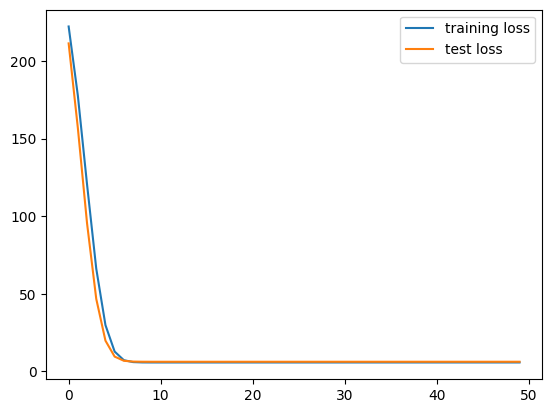

In [13]:
import matplotlib.pylab as plt

plt.plot(train_loss_history, label = "training loss")
plt.plot(test_loss_history, label = "test loss")
plt.legend()
plt.show()

After training, we determine the final predictions for training and test data.

In [14]:
model.eval()
y_train_pred, y_test_pred = [], []
with torch.no_grad():      
    for inputs, targets in data_loader_train:
        outputs = model(inputs)
        y_train_pred.extend(outputs.detach().numpy().flatten().tolist())
    for inputs, targets in data_loader_test:
        outputs = model(inputs)
        y_test_pred.extend(outputs.detach().numpy().flatten().tolist())

We can evaluate the performance of the network in multiple ways, e.g., visually by comparing predictions to actual realizations.

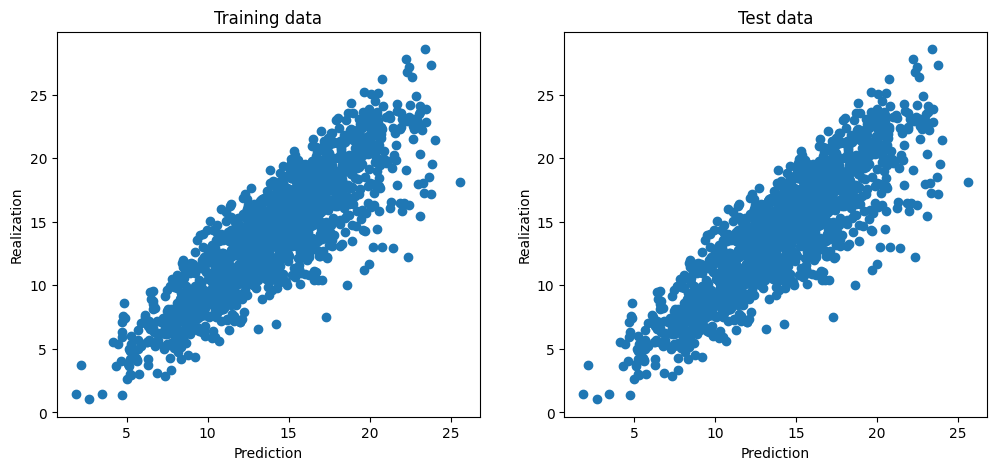

In [15]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

axs[0].scatter(y_train_pred, y_train)
axs[1].scatter(y_train_pred, y_train)

axs[0].set_title("Training data")
axs[1].set_title("Test data")

axs[0].set_xlabel("Prediction")
axs[1].set_xlabel("Prediction")

axs[0].set_ylabel("Realization")
axs[1].set_ylabel("Realization")

plt.show()

Or by determining scores metrics such as the coefficient of determination which measures the improvement of predictions when including the information of feature variables. Whenever, training performance is significantly better than test performance, we have an indication for over-fitting. Low performance may indicate a high signal-to-noise ratio or a model which may benefit from more flexibility.

In [16]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R2 score: {r2_train:.4f} - Test R2 score: {r2_test:.4f}")

Training R2 score: 0.7483 - Test R2 score: 0.7272


## Training a network for a binary classification task

Only a few modifications need to be made for training a neural network which can be used for a binary classification task. The target variable has two disjoint outcomes, e.g., to default or not default, to buy or not to buy, etc. Usually this variable is encoded to $\lbrace 0, 1 \rbrace$. An example with two feature variables can be seen below. Higher values for $x_1$ and lower values for $x_2$ seem to increase the probability that the target variable is equal to $1$. 

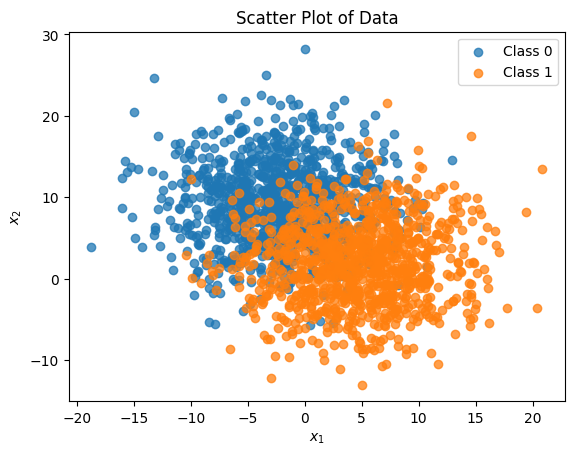

In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 2000, n_features=2, centers=2, cluster_std = 5, random_state=42)

plt.Figure(figsize = (8, 5))

for category in np.unique(y):
    plt.scatter(X[y == category][:, 0], X[y == category][:, 1], label=f'Class {category}', alpha = 0.75)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

scaler = MinMaxScaler(feature_range=(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler.fit(X_train)
X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_s, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_s, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_test = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32  
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
data_loader_test = DataLoader(dataset_test, batch_size=X_test.shape[0], shuffle=False)

Data preparation is as before. The network still generates one value per observation. This can be interpreted as a score. The higher the score, the more likely it is that this observation is of category $1$. Usually, this score is transformed into a probability by the sigmoid activation function. 

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

which transforms any real-valued input to the interval $[0, 1]$. Thus, this value can be interpreted as a probability for $P(Y=1)$. For a binary classification, this is all we need, because the probability of the other category is given by $P(Y=0) = 1 - P(Y=1)$. In comparison to the regression task, we need a different loss function. Usually, the cross-entropy loss is chosen. For every data point it determines:

$$
- y \log \left(\hat{y}\right) - \left(1 - y\right) \log \left(1 - \hat{y}\right)
$$

with $y$ being the category for an observation and $\hat{y}$ the probability prediction for the observation to be of category $1$. If the observation is $y=1$, the expression becomes:

$$
- \log \left(\hat{y}\right)
$$

and 

$$
- \log \left(1 - \hat{y}\right)
$$

This means the loss value for every observation is just the log of its corresponding probability prediction. I.e., if the observation if of category $1$, we calculate the negative log of the probability prediction that this observation is of category $1$; if the observation if of category $0$, we calculate the negative log of the probability prediction that this observation is of category $0$. The negative log of something gets smaller, the higher the input. This means, the higher the probability prediction for the category we actually observe, the lower the loss. This is exactly what we want and the loss function can be observed in the cell below.

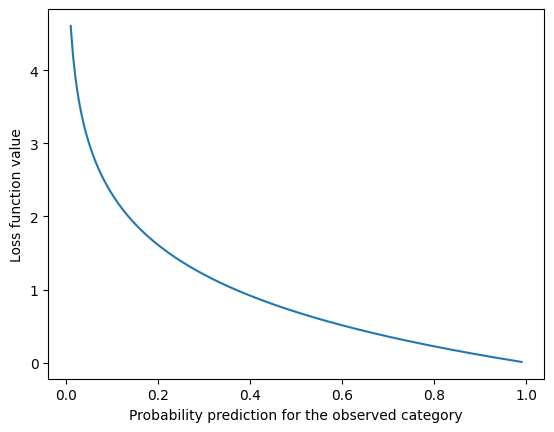

In [19]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(0.01, 0.99, 200)
loss = -np.log(x)

plt.plot(x, loss)
plt.xlabel("Probability prediction for the observed category")
plt.ylabel("Loss function value")
plt.show()

 The formal definition, how pytorch determines the loss function value is provided [here](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss). Note that the output of the network is usually not transformed with the sigmoid function as this is done internally by the loss function. 

Thus, except that we use a different loss function, nothing needs to be changed for the code from the regression model. 

In [22]:
import torch
from torch import nn
from torch.optim import Adam

# Model, loss function, and optimizer
model = ForwardNN(in_dim=X.shape[1], hidden_dim=2, out_dim=1)
model.train()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=0.005)

n_epochs = 25
train_loss_history, test_loss_history = [], []
for epoch in range(n_epochs):
    # Training phase
    model.train()  # Ensure the model is in training mode
    epoch_training_loss = 0
    for inputs, targets in data_loader_train:
        optimizer.zero_grad()         # Zero the gradients
        outputs = model(inputs)       # Forward pass
        loss = loss_fn(outputs, targets.view(-1, 1))  # Calculate loss
        loss.backward()               # Backward pass
        optimizer.step()              # Update parameters
        epoch_training_loss += loss.item()

    avg_epoch_training_loss = epoch_training_loss / len(data_loader_train)
    print(f"Epoch [{epoch+1}/{n_epochs}], Training Loss: {avg_epoch_training_loss:.4f}")
    train_loss_history.append(avg_epoch_training_loss)

    # Testing phase
    model.eval()  # Set model to evaluation mode
    test_epoch_loss = 0
    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, targets in data_loader_test:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets.view(-1, 1))
            test_epoch_loss += loss.item()
    
    avg_test_loss = test_epoch_loss / len(data_loader_test)
    print(f"Epoch [{epoch+1}/{n_epochs}], Test Loss: {avg_test_loss:.4f}")
    test_loss_history.append(avg_test_loss)

Epoch [1/25], Training Loss: 0.7236
Epoch [1/25], Test Loss: 0.6946
Epoch [2/25], Training Loss: 0.6674
Epoch [2/25], Test Loss: 0.6375
Epoch [3/25], Training Loss: 0.5987
Epoch [3/25], Test Loss: 0.5722
Epoch [4/25], Training Loss: 0.5287
Epoch [4/25], Test Loss: 0.5024
Epoch [5/25], Training Loss: 0.4628
Epoch [5/25], Test Loss: 0.4421
Epoch [6/25], Training Loss: 0.4126
Epoch [6/25], Test Loss: 0.4029
Epoch [7/25], Training Loss: 0.3813
Epoch [7/25], Test Loss: 0.3810
Epoch [8/25], Training Loss: 0.3633
Epoch [8/25], Test Loss: 0.3695
Epoch [9/25], Training Loss: 0.3531
Epoch [9/25], Test Loss: 0.3635
Epoch [10/25], Training Loss: 0.3476
Epoch [10/25], Test Loss: 0.3604
Epoch [11/25], Training Loss: 0.3447
Epoch [11/25], Test Loss: 0.3589
Epoch [12/25], Training Loss: 0.3430
Epoch [12/25], Test Loss: 0.3582
Epoch [13/25], Training Loss: 0.3422
Epoch [13/25], Test Loss: 0.3579
Epoch [14/25], Training Loss: 0.3417
Epoch [14/25], Test Loss: 0.3578
Epoch [15/25], Training Loss: 0.3414
E

This is the development of the loss during training.

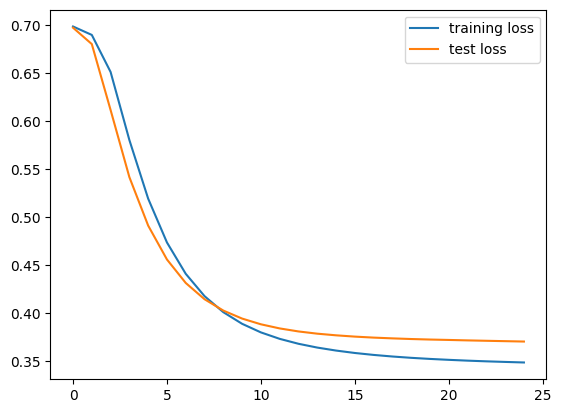

In [44]:
import matplotlib.pylab as plt

plt.plot(train_loss_history, label = "training loss")
plt.plot(test_loss_history, label = "test loss")
plt.legend()
plt.show()

Once the model is trained, we can collect probability predictions for each observation. A simple rule is to create the final categorical prediction by choosing the category with the larger probability prediction.

In [25]:
sigmoid = nn.Sigmoid()
model.eval()
y_train_pred, y_test_pred = [], []
with torch.no_grad():      
    for inputs, targets in data_loader_train:
        outputs = model(inputs)
        y_train_pred.extend(sigmoid(outputs.detach()).numpy().flatten().tolist())
    for inputs, targets in data_loader_test:
        outputs = model(inputs)
        y_test_pred.extend(sigmoid(outputs.detach()).numpy().flatten().tolist())

y_train_cat_pred = np.round(y_train_pred)
y_test_cat_pred = np.round(y_test_pred)

A detailed overview of prediction is to take a look at the confusion matrix which compares predicted with actual categories. All observations on the diagonal are correct predictions. The off-diagonal elements are different errors which can be made:

* False positives: the model predicts $1$ for an actual $0$
* False negatives: the model predicts $0$ for an actual $1$

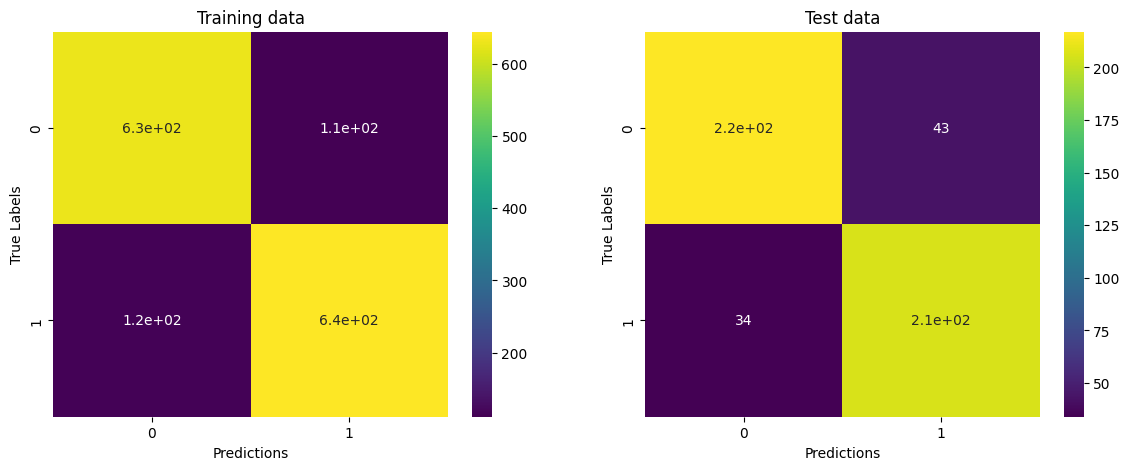

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pylab as plt
import seaborn as sns

cm_train = confusion_matrix(y_train, y_train_cat_pred, labels=[0, 1])
cm_test = confusion_matrix(y_test, y_test_cat_pred, labels=[0, 1])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_train, annot = True, cmap='viridis', ax = axs[0])

axs[0].set_xlabel('Predictions')
axs[0].set_ylabel('True Labels')
axs[0].set_title('Training data')

sns.heatmap(cm_test, annot = True, cmap='viridis', ax = axs[1])

axs[1].set_xlabel('Predictions')
axs[1].set_ylabel('True Labels')
axs[1].set_title('Test data')

plt.show()

To quantify the performance, we can take a look at different metrics. I always would suggest not to rely upon accuracies, only, and rather include more detailed evaluation by including metrics such as the precision or the recall. 

In [321]:
acc_train, acc_test = accuracy_score(y_train, y_train_cat_pred), accuracy_score(y_test, y_test_cat_pred)
prec_train, prec_test = precision_score(y_train, y_train_cat_pred), precision_score(y_test, y_test_cat_pred)
recall_train, recall_test = recall_score(y_train, y_train_cat_pred), recall_score(y_test, y_test_cat_pred)

pd.DataFrame(
    dict(training_scores = [acc_train, prec_train, recall_train], test_scores = [acc_test, prec_test, recall_test]),
    index = ["accuracy", "precision", "recall"]
).round(4)

,training_scores,test_scores
accuracy,0.8900,0.9060
precision,0.8934,0.9218
recall,0.8850,0.8889


## Training a neural network for a multi-class classification task

If the target variable has more than two categories, only the dimensionality of the model output needs to be adjusted in comparison to the binary task. For $K$ categories, one usually creates $K$ output neurons. Each representing a score for a specific category. The scores are transformed to probabilities by applying the softmax function to each category.

$$
g(z_{k}) = \frac{e^{z_{k}}}{\sum_l e^{z_{l}}} = \pi_{k}
$$

Once this is done, the cross-entropy loss can be used, because it always determines its value by the negative log of the probability prediction for the observed category. This can be done for two, but also an arbitrary number of $K$ categories. 

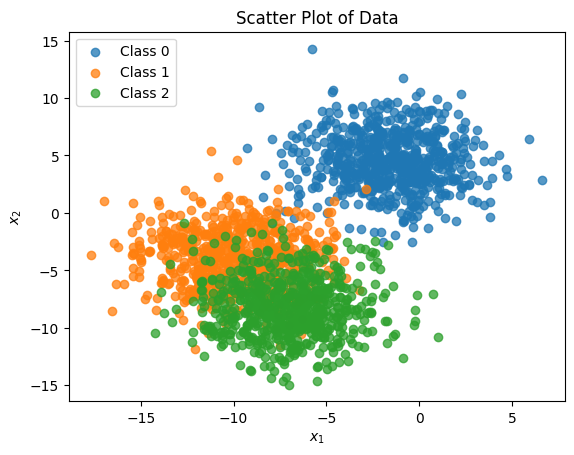

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 2000, n_features=2, centers=3, cluster_std = 2.5, random_state=1)

plt.Figure(figsize = (8, 5))

for category in np.unique(y):
    plt.scatter(X[y == category][:, 0], X[y == category][:, 1], label=f'Class {category}', alpha = 0.75)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler.fit(X_train)
X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_s, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_s, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_test = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32  
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
data_loader_test = DataLoader(dataset_test, batch_size=X_test.shape[0], shuffle=False)

For the example, we have three categories which is why we set the output dimension to three for the neural network below.

In [36]:
import torch
from torch import nn
from torch.optim import Adam

# Model, loss function, and optimizer
model = ForwardNN(in_dim=X.shape[1], hidden_dim=2, out_dim=3)
model.train()
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.005)

n_epochs = 50
train_loss_history, test_loss_history = [], []
for epoch in range(n_epochs):
    # Training phase
    model.train()  # Ensure the model is in training mode
    epoch_training_loss = 0
    for inputs, targets in data_loader_train:
        optimizer.zero_grad()         # Zero the gradients
        outputs = model(inputs)       # Forward pass
        loss = loss_fn(outputs, targets.long())  # Calculate loss
        loss.backward()               # Backward pass
        optimizer.step()              # Update parameters
        epoch_training_loss += loss.item()

    avg_epoch_training_loss = epoch_training_loss / len(data_loader_train)
    print(f"Epoch [{epoch+1}/{n_epochs}], Training Loss: {avg_epoch_training_loss:.4f}")
    train_loss_history.append(avg_epoch_training_loss)

    # Testing phase
    model.eval()  # Set model to evaluation mode
    test_epoch_loss = 0
    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, targets in data_loader_test:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets.long())
            test_epoch_loss += loss.item()
    
    avg_test_loss = test_epoch_loss / len(data_loader_test)
    print(f"Epoch [{epoch+1}/{n_epochs}], Test Loss: {avg_test_loss:.4f}")
    test_loss_history.append(avg_test_loss)

Epoch [1/50], Training Loss: 1.2031
Epoch [1/50], Test Loss: 1.0977
Epoch [2/50], Training Loss: 1.0187
Epoch [2/50], Test Loss: 0.9088
Epoch [3/50], Training Loss: 0.8740
Epoch [3/50], Test Loss: 0.7888
Epoch [4/50], Training Loss: 0.7793
Epoch [4/50], Test Loss: 0.7081
Epoch [5/50], Training Loss: 0.7032
Epoch [5/50], Test Loss: 0.6367
Epoch [6/50], Training Loss: 0.6281
Epoch [6/50], Test Loss: 0.5673
Epoch [7/50], Training Loss: 0.5576
Epoch [7/50], Test Loss: 0.5021
Epoch [8/50], Training Loss: 0.4935
Epoch [8/50], Test Loss: 0.4427
Epoch [9/50], Training Loss: 0.4372
Epoch [9/50], Test Loss: 0.3920
Epoch [10/50], Training Loss: 0.3919
Epoch [10/50], Test Loss: 0.3536
Epoch [11/50], Training Loss: 0.3587
Epoch [11/50], Test Loss: 0.3268
Epoch [12/50], Training Loss: 0.3356
Epoch [12/50], Test Loss: 0.3090
Epoch [13/50], Training Loss: 0.3203
Epoch [13/50], Test Loss: 0.2969
Epoch [14/50], Training Loss: 0.3100
Epoch [14/50], Test Loss: 0.2884
Epoch [15/50], Training Loss: 0.3026
E

Model loss during training.

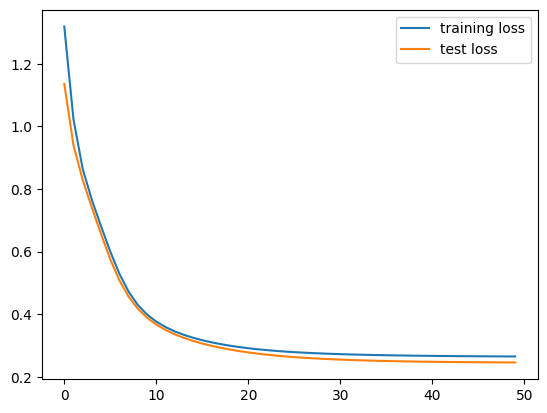

In [51]:
import matplotlib.pylab as plt

plt.plot(train_loss_history, label = "training loss")
plt.plot(test_loss_history, label = "test loss")
plt.legend()
plt.show()

Create probability predictions.

In [38]:
softmax = nn.Softmax(dim = 1)
model.eval()
y_train_pred, y_test_pred = [], []
with torch.no_grad():      
    for inputs, targets in data_loader_train:
        outputs = model(inputs)
        y_train_pred.extend(softmax(outputs.detach()).numpy())
    for inputs, targets in data_loader_test:
        outputs = model(inputs)
        y_test_pred.extend(softmax(outputs.detach()).numpy())

y_train_pred = np.array(y_train_pred)
y_test_pred = np.array(y_test_pred)
y_train_cat_pred = y_train_pred.argmax(axis = 1)
y_test_cat_pred = y_test_pred.argmax(axis = 1)

Confusion matrix.

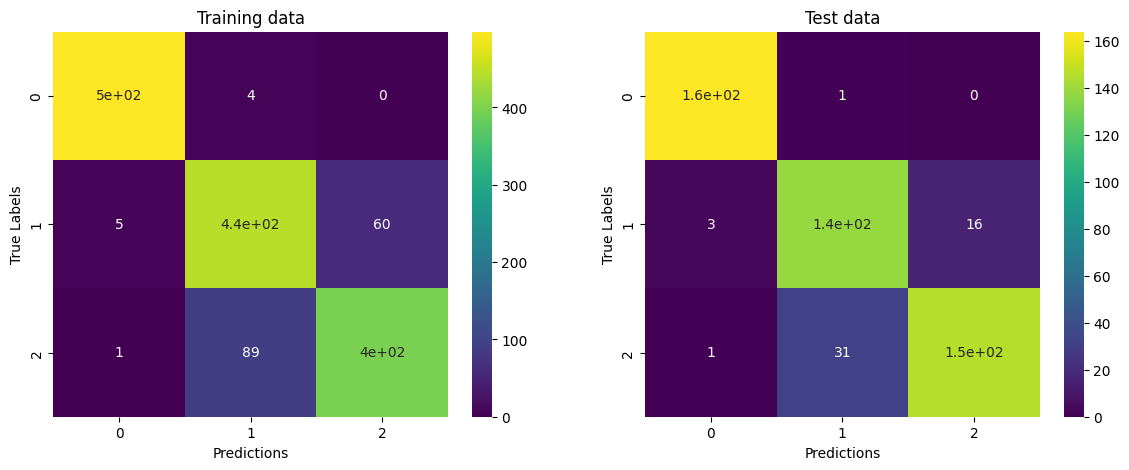

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pylab as plt
import seaborn as sns

cm_train = confusion_matrix(y_train, y_train_cat_pred, labels=[0, 1, 2])
cm_test = confusion_matrix(y_test, y_test_cat_pred, labels=[0, 1, 2])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_train, annot = True, cmap='viridis', ax = axs[0])

axs[0].set_xlabel('Predictions')
axs[0].set_ylabel('True Labels')
axs[0].set_title('Training data')

sns.heatmap(cm_test, annot = True, cmap='viridis', ax = axs[1])

axs[1].set_xlabel('Predictions')
axs[1].set_ylabel('True Labels')
axs[1].set_title('Test data')

plt.show()

For multi-class tasks, we can determine precision and recall per category.

In [65]:
multi_precision_train = precision_score(y_train, y_train_cat_pred, average = None)
multi_precision_test = precision_score(y_test, y_test_cat_pred, average = None)
multi_recall_train = recall_score(y_train, y_train_cat_pred, average = None)
multi_recall_test = recall_score(y_test, y_test_cat_pred, average = None)

pd.DataFrame(
    np.concatenate(
        (
            multi_precision_train.reshape(1, -1),
            multi_recall_train.reshape(1, -1),
            multi_precision_test.reshape(1, -1),
            multi_recall_test.reshape(1, -1)
        ), axis = 0
    ), 
    columns = ["Category 0", "Category 1", "Category 2"],
    index = ["Training precision", "Training recall", "Test precision", "Test recall"]
)

,Category 0,Category 1,Category 2
Training precision,0.988095,0.827138,0.868996
Training recall,0.992032,0.872549,0.815574
Test precision,0.976190,0.811765,0.901235
Test recall,0.993939,0.878981,0.820225
